# Initial EDA

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

In [37]:
df = pd.read_csv("/Users/sa10/Downloads/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [38]:
df.shape

(6362620, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [40]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [41]:
fraud_counts = df['isFraud'].value_counts()
fraud_count = fraud_counts.get(1, 0)
print(f"Number of fraudulent cases: {fraud_count}")

Number of fraudulent cases: 8213


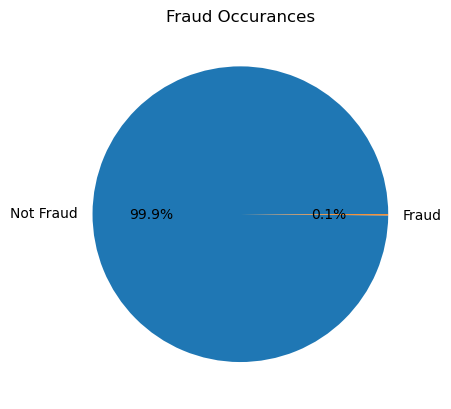

In [42]:
# create pie chart
plt.figure()
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=["Not Fraud", "Fraud"])
plt.title("Fraud Occurances")
plt.ylabel('')
plt.show()

When looking at all the data gathered, the percentage of fraudulence compared to non-fraudulence is very low. Fraud appears to be only 0.1% of the dataset, which contains 6,362,620 lines of data.

In [43]:
flagged_fraud_counts = df['isFlaggedFraud'].value_counts()
flagged_fraud_count = flagged_fraud_counts.get(1, 0)
print(f"Number of flagged fraudulent cases: {flagged_fraud_count}")

Number of flagged fraudulent cases: 16


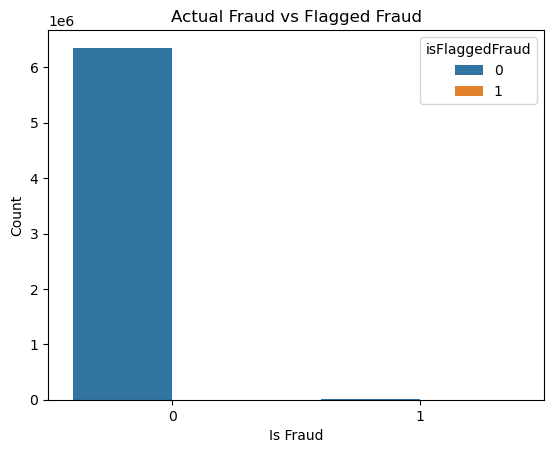

In [44]:
# create countplot
sns.countplot(data=df, x='isFraud', hue='isFlaggedFraud')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.title('Actual Fraud vs Flagged Fraud')
plt.show()

When comparing the occurrence of fraud to the fraud that has been flagged or detected, we can see a significant disparity between them. There are a total of 16 flagged fraud cases compared to the actual 8,213 fraud cases. This means that whichever system is in charge of detecting fraud is only doing so successfully at a 0.002% rate.

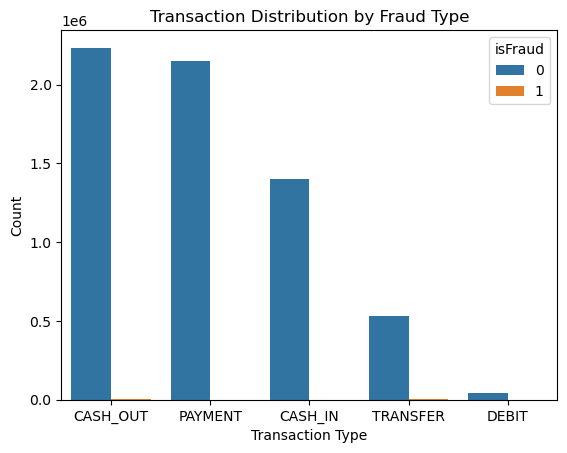

In [45]:
# create countplot
sns.countplot(data=df, x='type', hue='isFraud', order=df['type'].value_counts().index)
# label and title
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Distribution by Fraud Type')
# show plot
plt.show()

This shows the distribution of transactions by type and highlights where most of the fraud is occurring. As we can see, 'cash_out' and 'transfer' are the only transaction types with fraudulent activity. Looking at this, we can also start to question whether the high count of 'cash_out' transactions could be affecting the system's ability to detect fraud, since it is the most frequent transaction type.

In [46]:
fraud_in_types = df.groupby('type').agg(
    fraud_count=('isFraud', 'sum'),
    flagged_fraud_count=('isFlaggedFraud', 'sum')
).reset_index()

print(fraud_in_types)

       type  fraud_count  flagged_fraud_count
0   CASH_IN            0                    0
1  CASH_OUT         4116                    0
2     DEBIT            0                    0
3   PAYMENT            0                    0
4  TRANSFER         4097                   16


The only fraud detected was in transactions made by transfer. Even then, the rate of detecting fraud in transfer transactions is about 0.004%. We can also see that for cash-out transactions, fraud was never detected, despite it occurring more frequently than in transfer transactions.

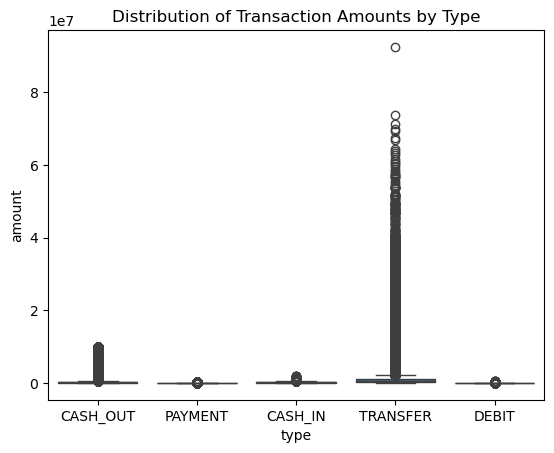

In [47]:
# create boxplot
plt.figure()
sns.boxplot(data=df, x='type', y='amount', order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Amounts by Type')
plt.show()

Cash out and transfer transactions have more variability, meaning it may be more difficult to detect fraud. This could explain why fraud is only affecting these transaction types.

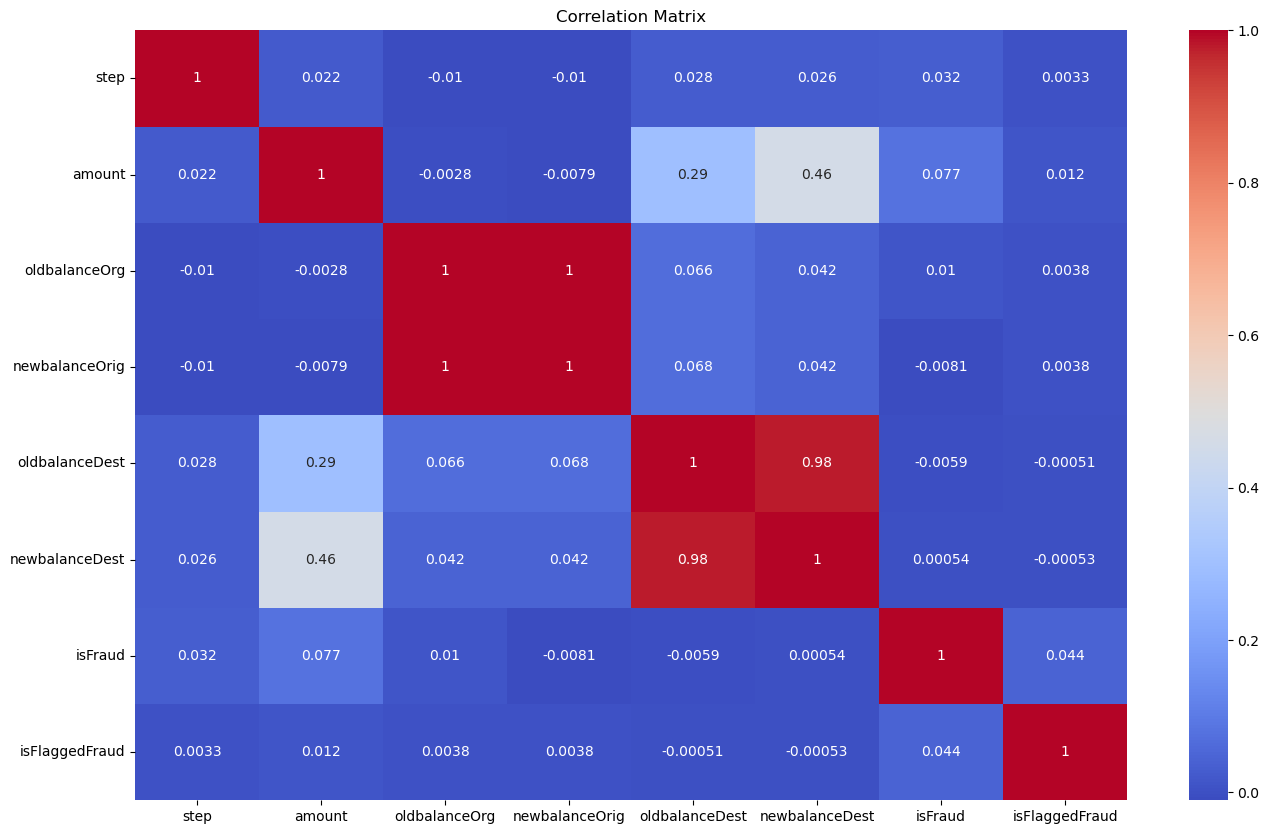

In [48]:
# create heatmap
correlation_matrix = df.corr(numeric_only=True)
# label and title
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# show plot
plt.show()

The distributions of 'amount', 'step', and 'oldbalanceOrg' have a higher correlation with unflagged fraud, in that order. This indicates that these features should be further explored as we analyze the dataset.

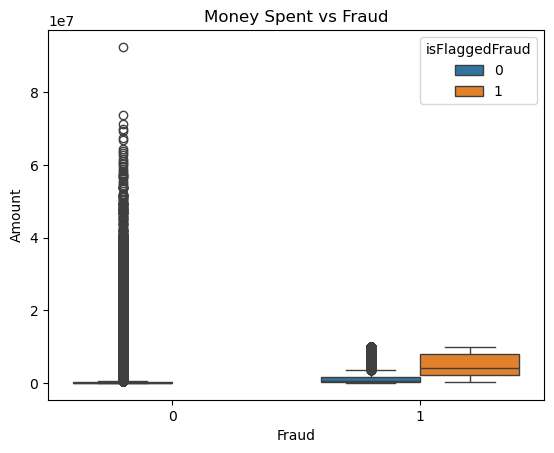

In [49]:
# create boxplot
plt.figure()
sns.boxplot(data=df, x='isFraud', y='amount', hue='isFlaggedFraud')

# labels and title
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Money Spent vs Fraud')

# show plot
plt.show()

Flagged fraud seems to be more closely related to money. There doesn’t seem to be any outliers when looking at the flagged fraud boxplot. This suggests that the system is likely looking for a specific amount to flag as fraud. When comparing this boxplot to the unflagged fraud data, we see that the range of amounts is fairly similar. A value of 0 indicates no fraud, and this shows us that the amounts spent in non-fraudulent exchanges are highly varied, as seen with the multiple outliers. This further supports the idea that there is a correlation between fraud and the amount of money spent.

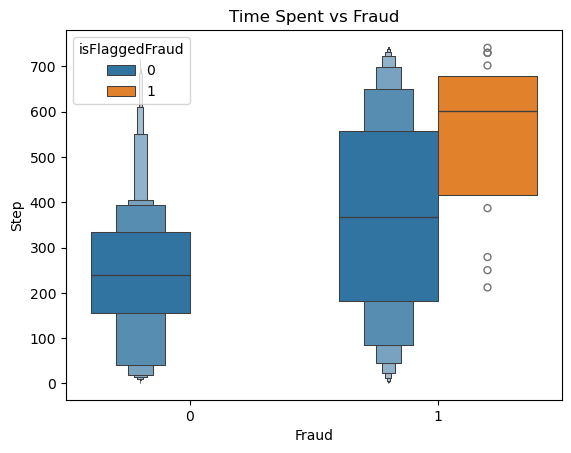

In [50]:
# create boxenplot
plt.figure()
sns.boxenplot(data=df, x='isFraud', y='step', hue='isFlaggedFraud')
# label
plt.xlabel('Fraud')
plt.ylabel('Step')
plt.title('Time Spent vs Fraud')

# show plot
plt.show()

It seems that the time spent during the transaction, or the overall time spent in the purchasing process, tends to be higher in cases of fraud. However, this is not a blanket statement, as there is considerable variation in the time spent on non-fraudulent transactions. That being said, the median time for fraud and flagged fraud transactions is significantly higher than for regular transactions. This could lead us to believe that there could be a possible correlation with more time spent meaning there is a higher chance of fraud taking place.

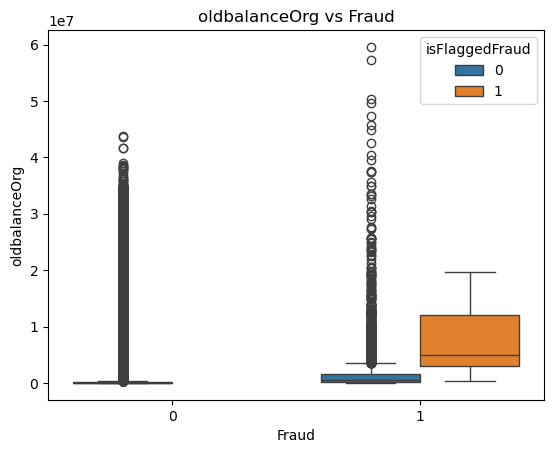

In [51]:
# create boxplot
plt.figure()
sns.boxplot(data=df, x='isFraud', y='oldbalanceOrg', hue='isFlaggedFraud')

# labels and title
plt.xlabel('Fraud')
plt.ylabel('oldbalanceOrg')
plt.title('oldbalanceOrg vs Fraud')

# show plot
plt.show()

When we look at the original balance of the account where the transaction is made, we can see that for the cases that were not fraud, there doesn't seem to be much variation in the max, median, and minimum values. This could suggest that, since these are real transactions, there is no set pattern for how much was in the original account before the transaction.

For fraud, we can observe that for flagged fraud, there are no outliers, and the fraud detection system seems to be looking for around that amount of funds in the original account. However, for fraud that isn't flagged, there are many outliers, and the min, median, and max values are lower than for flagged fraud, which could explain why it had difficulty detecting those cases. Additionally, we see that unflagged fraud has higher outliers than non-fraud transactions, indicating a lot of variation.

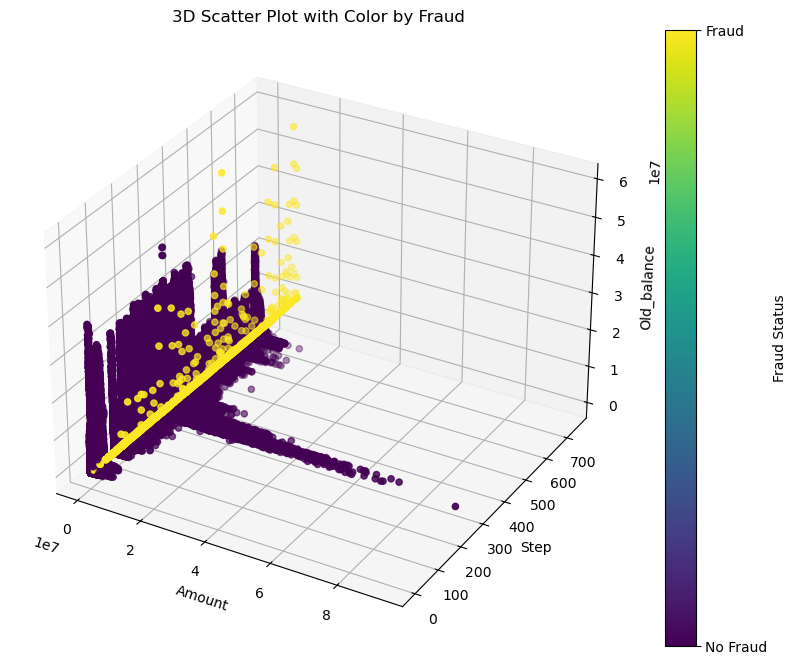

In [52]:
# create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['amount'], df['step'], df['oldbalanceOrg'], c=df['isFraud'], cmap='viridis')

# labels
ax.set_xlabel('Amount')
ax.set_ylabel('Step')
ax.set_zlabel('Old_balance')
ax.set_title('3D Scatter Plot with Color by Fraud')
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['No Fraud', 'Fraud'])
cbar.set_label('Fraud Status')

# show plot
plt.show()


In this graph, I wanted to visualize fraud and non-fraud transactions alongside the three previous features I compared, to see if there seems to be any trends. When looking at the yellow dots that indicate fraud, we can clearly see that the old balance in the accounts of origin is much higher than in the non-fraudulent ones. Although most of the fraud tends to be in the lower range, there is a lot of variation that extends higher than what seems to be considered normal for the rest of the transactions. We can also observe a very low correlation between step (time) and fraud occurrence, as they appear to be spread out fairly similarly. Lastly, when looking at the amount of money transferred, we see that the transactions with the highest amounts are non-fraudulent, so there isn't much of a correlation between amount and fraud.